# Titanic - Árboles de decisión

## Machine learning: Desicion Tree on the Titanic dataset

In [1023]:
#Importar librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [1024]:
#Importar base de datos
data = pd.read_csv("Titanic-Dataset.csv")
#visualización 5 primeras filas
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1025]:
#Dimensiones del DataFrame
data.shape

(891, 12)

**Contamos con un total de 891 filas y 12 columnas**

In [1026]:
#Datos estadisticos basicos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**A partir de los datos generados en pantalla se pueden tomar en consideración ciertos valores para tener una comprensión basica del tema en cuestión**

**Ejemplo: Observamos que el promedio de edad de los pasajeras rondaba los 29, con una desviación estandar de 14, 80 como edad maxima y un total de 714 datos**

In [1027]:
#Detección de valores faltantes o nulos
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1028]:
data.isna().sum() / len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**Total de 866 valores faltantes, 177 en edad, 687 en camarote y 2 en puerto de embarcación**

**Edad: 19%, Camarote: 77%, Puerto de embarcación: 0.2%**

In [1029]:
#Eliminar valores nulos columna Cabin
data.drop('Cabin',axis=1,inplace=True)

In [1030]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [1031]:
imputer=SimpleImputer(strategy='median')
data['Age']=impute.fit_transform(data[['Age']])
data.to_csv('titanic_imputed.csv', index=False)

In [1032]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [1033]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1034]:
impute=SimpleImputer(strategy='constant')
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.to_csv('titanic_imputed.csv', index=False)

In [1035]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

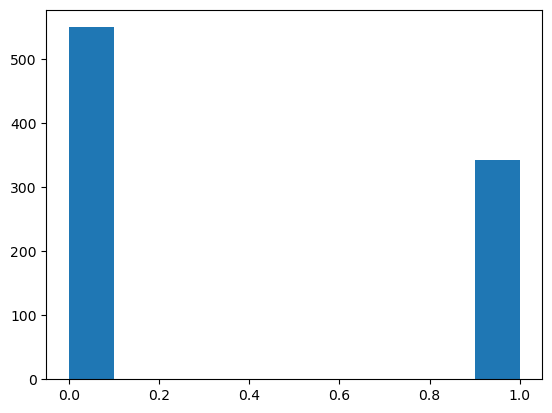

In [1036]:
#Representación grafica de la distribución de los datos
plt.hist(data.Survived)

**Representación grafica del número de pesajeros que sobrevivio al naufragio (0 -> No sobrevivió, 1 -> Sobrevivió)**

<Axes: xlabel='Age', ylabel='Fare'>

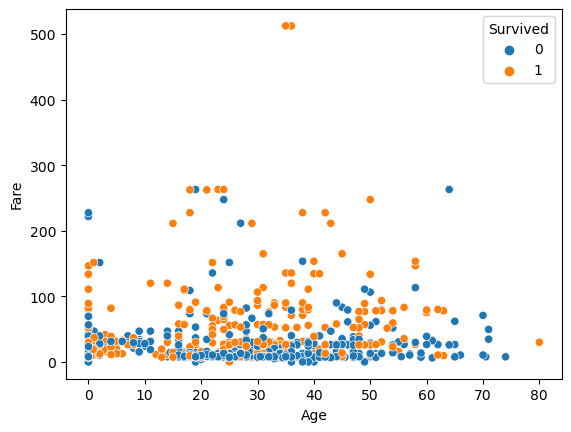

In [1037]:
#Grafico de dispersión
sns.scatterplot(x = "Age", y = "Fare", hue = "Survived", data = data)

**Los puntos entre si cuentan con una gran proximidad unos entre otros ya que en terminos generales el promedio del precio pagado por billete es de 32**

**Hay una clara concentración de puntos azules entre el rango de edad 20-50, considerando que se encuentran en la escala mas baja en cuanto a precio pagado por billete se podria inferir que en su mayoria este conjunto de pasajeros pertenecen a tercera clase**

**Otra conclusión a partir de la gráfica se da al examinar el número de supervivientes al comparar precios, a mayor precio pagado por billete existe una tendencia de mayor probabilidad a no morir ahogado en terribles condiciones**

In [1038]:
#Columnas utilizadas como predictores
predictors_col = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
target_col = ['Survived']

In [1039]:
data['Sex_Numeric'] = data['Sex'].factorize()[0]
predictors_col.append('Sex_Numeric')

**Considerando que la columna correspondiente a la caracteristica Sex es de tipo string, 0 pasa a ser genero masculino y 1 genero femenino**

In [1040]:
predictors = data[predictors_col]
target = data[target_col]

In [1041]:
#Ejecutamos
predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_Numeric
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,1
888,3,0.0,1,2,23.4500,1
889,1,26.0,0,0,30.0000,0


In [1042]:
#Ejecutamos
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [1043]:
#Hallar la correlación de las columnas seleccionadas
corr = predictors.corr()
corr

,Pclass,Age,SibSp,Parch,Fare,Sex_Numeric
Pclass,1.000000,-0.361353,0.083081,0.018443,-0.549500,-0.131900
Age,-0.361353,1.000000,-0.184664,-0.048786,0.135516,-0.024978
SibSp,0.083081,-0.184664,1.000000,0.414838,0.159651,0.114631
Parch,0.018443,-0.048786,0.414838,1.000000,0.216225,0.245489
Fare,-0.549500,0.135516,0.159651,0.216225,1.000000,0.182333
Sex_Numeric,-0.131900,-0.024978,0.114631,0.245489,0.182333,1.000000


**Mediremos las correlación de las variables en base a sus coeficientes, mientras más cercano se encuentre el valor a 1, más alta su asociación, en cambio un valor cercano a cero expresa una mayor dispersión**

**Valores cercanos a 1 → Alta correlación directa (directamente proporcional), Valores cercano a -1 → Alta correlación inversa (inversamente proporcional), Valores iguales a 0 → Nula correlación**

**Ejemplo: El coeficiente de correlación entre el precio pagado por el billete y el sexo de cada pasagero es de 0.182333, lo que evidencia una correlación casi que nula, en otras palabras se podria asumir que el genero no influyó en el precio a pagado por billete**

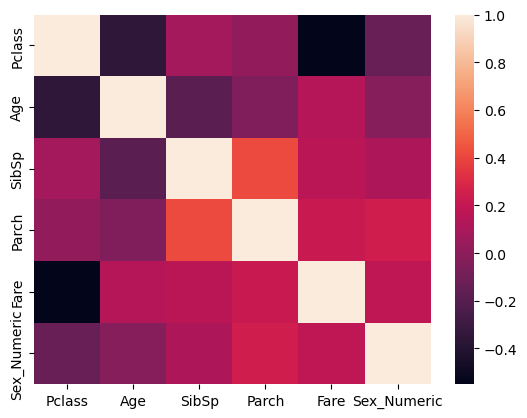

In [1044]:
#Generación de mapa de calor para facilitar la comprensión de la tabla anterior
sns.heatmap (corr)
plt.show()

**Mismos datos representados en diferente forma**

In [1045]:
#Finalizamos el análisis general, damos paso a la ejecución del modelo seleccionado (Árboles de decisión) → División en bloques del conjunto de datos
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.1, random_state=13)

In [1046]:
tree = DecisionTreeClassifier()

In [1047]:
#Geneción diagrama de arbol, selección de datos
arbol = tree.fit(X_train, Y_train)

[Text(0.573031190248566, 0.9761904761904762, 'x[5] <= 0.5\ngini = 0.475\nsamples = 801\nvalue = [490, 311]'),
 Text(0.3867411567877629, 0.9285714285714286, 'x[4] <= 26.269\ngini = 0.315\nsamples = 520\nvalue = [418, 102]'),
 Text(0.2835205544933078, 0.8809523809523809, 'x[3] <= 0.5\ngini = 0.231\nsamples = 367\nvalue = [318, 49]'),
 Text(0.2343451242829828, 0.8333333333333334, 'x[1] <= 32.5\ngini = 0.191\nsamples = 336\nvalue = [300, 36]'),
 Text(0.1818833652007648, 0.7857142857142857, 'x[1] <= 30.75\ngini = 0.219\nsamples = 248\nvalue = [217, 31]'),
 Text(0.12667304015296368, 0.7380952380952381, 'x[1] <= 24.75\ngini = 0.189\nsamples = 236\nvalue = [211, 25]'),
 Text(0.08891013384321224, 0.6904761904761905, 'x[2] <= 0.5\ngini = 0.166\nsamples = 175\nvalue = [159, 16]'),
 Text(0.05927342256214149, 0.6428571428571429, 'x[4] <= 7.133\ngini = 0.149\nsamples = 160\nvalue = [147, 13]'),
 Text(0.05162523900573614, 0.5952380952380952, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.06692

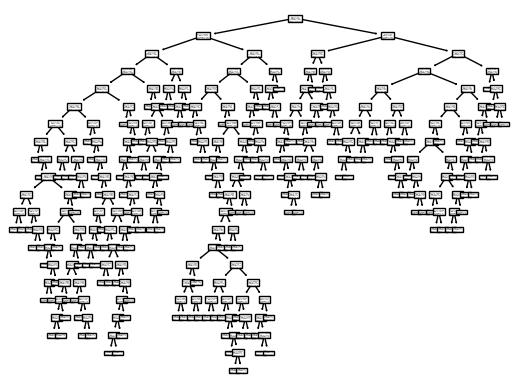

In [1048]:
plot_tree(arbol)

**El modelo se extiende (división de datos) indefinidamente hasta llegar a un ratio de Gini igual a 0, si tenemos en cuenta que este mide la impureza del nodo entonces llegaremos a la conclusión de que a través de la generación de ramificaciones el sistema pretende alcanzar ese valor de 0% y cubrir todas las rutas posibles**

In [1049]:
Y_train_pred = tree.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

In [1050]:
Y_test_pred = tree.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

In [1051]:
print("Accuracy on the training set:", train_accuracy)
print("Accuracy on the testing set:", test_accuracy)

Accuracy on the training set: 0.9850187265917603
Accuracy on the testing set: 0.8111111111111111


**El modelo ha logrado tener un buen desempeño, los porcentajes de precición tanto para los datos de entrenamiento como para los de prueba han sido satisfactorios**

**Las probabilidades de un sobreajuste son relativamente bajas**

In [1052]:
#Toma el valor restante de 10% → 89 datos
predicciones = arbol.predict(X_test)

In [1053]:
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0])

**No se ahogo, no se ahogo, si se ahogo...**

**Predicciones realizadas con respecto a la variable objetivo "Survived"**

In [1054]:
#Matriz de confusión
pd.crosstab(np.array([Y[0] for Y in Y_test.values.tolist()]), predicciones, rownames=['Actual'], 
colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,48,11
1,6,25


**Matriz de confusión -> Evalua el modelo de clasificación**

**Total predicciones erroneas: 17**

In [1055]:
accuracy = accuracy_score(Y_test, predicciones)
accuracy

0.8111111111111111